In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### 0. Idea

The idea of this exercise is to compare two methods for pricing options:
- Pricing options using <b>Black Scholes Formula</b>
- Pricing options using <b>Monte Carlo Simulation</b>
<br>


We will be pricing European Call Option as a demonstration.

### 1. Defining Parameter

In [2]:
T = 5
r = 0.05
sigma = 0.2
S_0 = 100
K= 100
no_of_paths = 10000
no_of_steps = 1000

<Br>
</Br>

### 2. European Call Option Pricing

#### 2.1 Method 1 - Pricing European Call Option using Black Scholes Equation

The Black–Scholes Formula for Call Option specifies that:
$$C = S * N(d_{1}) - Ke^{-rT}N(d_{2}) $$
$$ where \ d_{1}=\frac{log(S/K) + (r+\sigma^{2}/2)*T}{\sigma * \sqrt{T}}, \ d_{2} = d_{1} - \sigma \sqrt{T}$$

In [3]:
def bs_call_option_price(S_0, K, sigma, T, r):
    d1 = (np.log (S_0/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S_0 * st.norm(0, 1).cdf(d1) - K * np.exp(-r * T) * st.norm(0, 1).cdf(d2)
    return call

In [4]:
call_price = bs_call_option_price(S_0, K, sigma, T, r)
print(f'The theoretical call price from Black Scholes Equation is {call_price}')

The theoretical call price from Black Scholes Equation is 29.13861974388604


<Br>
<Br>
</Br>

#### 2.2 Method 2 - Pricing European Call Option using Monte Carlo Simulation

First, we would <b>simulate multiple paths of stock price</b> using Euler Discretication. Assuming stock prices follow <b>Geometric Brownian Motion under Risk-Neutral Measure</b>

$$dS(t) = rS(t)dt + \sigma S(t)dW^{Q}(t)$$

In [5]:
def generate_paths_GMB_Euler(no_of_paths, no_of_steps, T, r, sigma, S_0):
    Z = np.random.normal(0.0, 1.0, [no_of_paths, no_of_steps])
    W = np.zeros([no_of_paths, no_of_steps+1])
    S = np.zeros([no_of_paths, no_of_steps+1])
    S[:,0] = S_0
    time = np.zeros([no_of_steps+1])

    dt = T / float(no_of_steps)
    for i in range(0, no_of_steps):
        ## Making sure random numbers generated follow Standard Normal Distribution by normalizing them
        Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        # Euler Discretization
        W[:,i+1] = W[:,i] + np.sqrt(dt) * Z[:,i]
        S[:,i+1] = S[:,i] + r * S[:,i] * dt + sigma * S[:,i] * (W[:,i+1] - W[:,i])
        time[i+1] = time[i] + dt

    paths = {'time': time, 'S': S}
    return paths    
    
paths = generate_paths_GMB_Euler(no_of_paths, no_of_steps, T, r, sigma, S_0)

Text(0.5, 1.0, 'Simulation of Stock Price S(t)')

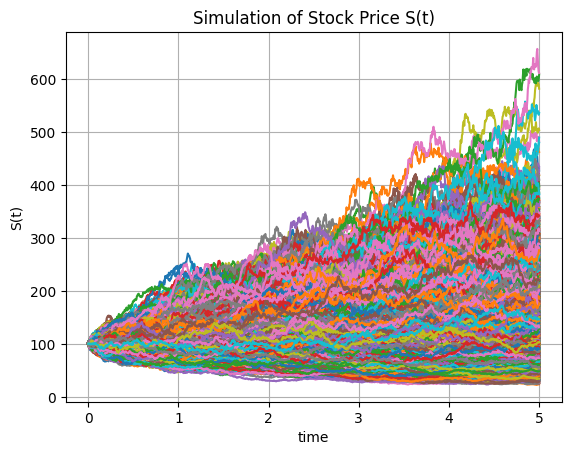

In [6]:
plt.figure(1)
plt.plot(paths['time'], np.transpose(paths['S']))
plt.grid()
plt.xlabel("time")
plt.ylabel("S(t)")
plt.title("Simulation of Stock Price S(t)")

Now, under <b>Risk-Neutral Pricing</b>, the price V(t) of the derivative security at time t is given by:

$$ V(t) = \tilde{\mathbb{E}} \left[ e^{- \int_t^T r(u) \, du} V(T) \mid \mathcal{F}(t) \right]$$

where we take the <b>conditional expectation under Risk-Neutral Measure of the discounted payoff at maturity</b>

In [7]:
def price_EUCallOption_MC(S, K, T, r):
    return np.exp(-r * T) * np.mean(np.maximum(S-K, 0))

In [8]:
call_price = price_EUCallOption_MC(paths['S'][:,-1], K, T, r)
print(f'The call price from Monte Carlo Simulation is {call_price}')

The call price from Monte Carlo Simulation is 29.189970710198327
